In [7]:
import geopandas

In [8]:
from shapely.geometry import box
s = geopandas.GeoSeries(geopandas.points_from_xy(range(5), range(5)))


In [9]:
s.sindex.query(box(1, 1, 3, 3))


array([1, 2, 3], dtype=int64)

In [10]:
s.sindex.query(box(1, 1, 3, 3), predicate="contains")


array([2], dtype=int64)

In [11]:
s2 = geopandas.GeoSeries([box(1, 1, 3, 3), box(4, 4, 5, 5)])
s2

0    POLYGON ((3 1, 3 3, 1 3, 1 1, 3 1))
1    POLYGON ((5 4, 5 5, 4 5, 4 4, 5 4))
dtype: geometry

<Axes: >

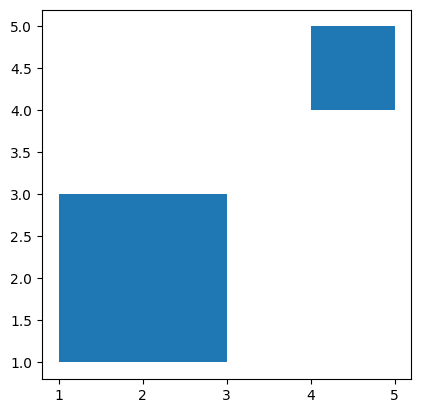

In [12]:
s2.plot()

In [13]:
s.sindex.query(s2)

array([[0, 0, 0, 1],
       [1, 2, 3, 4]], dtype=int64)

<Axes: >

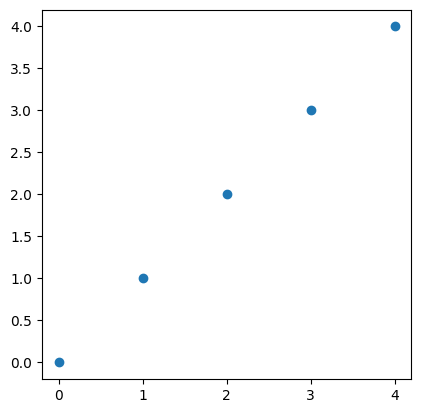

In [14]:
s.plot()

In [15]:
s.sindex.query(s2, predicate="contains")

array([[0],
       [2]], dtype=int64)

<Axes: >

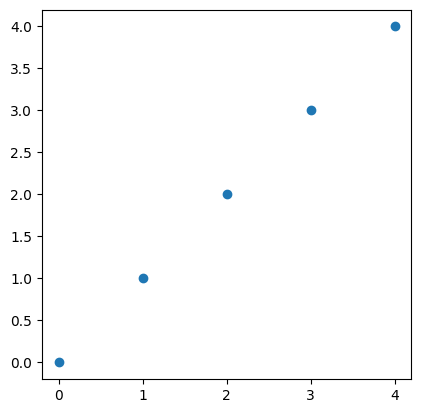

In [16]:
s.plot()

In [17]:
import geopandas as gpd

In [19]:
data = gpd.read_file("1.08_Crash_Data_Report_(detail).csv")

In [20]:
data.head(2)

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0,Intersection Non Interchange,...,Driver,20,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.92,Not Junction Related,...,,,,,,,,,33.42319,-111.93769


In [21]:
data.columns

Index(['X', 'Y', 'OBJECTID', 'Incidentid', 'DateTime', 'Year', 'StreetName',
       'CrossStreet', 'Distance', 'JunctionRelation', 'Totalinjuries',
       'Totalfatalities', 'Injuryseverity', 'Collisionmanner',
       'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One',
       'Age_Drv1', 'Gender_Drv1', 'Traveldirection_One', 'Unitaction_One',
       'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1', 'Unittype_Two',
       'Age_Drv2', 'Gender_Drv2', 'Traveldirection_Two', 'Unitaction_Two',
       'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2', 'Latitude',
       'Longitude'],
      dtype='object')

In [24]:
sp = gpd.GeoDataFrame(data)

In [25]:
sp.head(2)

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0,Intersection Non Interchange,...,Driver,20,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.92,Not Junction Related,...,,,,,,,,,33.42319,-111.93769


In [29]:
sp['Latitude'].dtype

dtype('O')

In [40]:
sp.dtypes

X                      object
Y                      object
OBJECTID               object
Incidentid             object
DateTime               object
Year                   object
StreetName             object
CrossStreet            object
Distance               object
JunctionRelation       object
Totalinjuries          object
Totalfatalities        object
Injuryseverity         object
Collisionmanner        object
Lightcondition         object
Weather                object
SurfaceCondition       object
Unittype_One           object
Age_Drv1               object
Gender_Drv1            object
Traveldirection_One    object
Unitaction_One         object
Violation1_Drv1        object
AlcoholUse_Drv1        object
DrugUse_Drv1           object
Unittype_Two           object
Age_Drv2               object
Gender_Drv2            object
Traveldirection_Two    object
Unitaction_Two         object
Violation1_Drv2        object
AlcoholUse_Drv2        object
DrugUse_Drv2           object
Latitude  

In [34]:
sp['Latitude'].unique()

array(['33.42191', '33.42319', '33.41842', ..., '33.4355576854058',
       '33.4355757080604', '33.4366212642373'], dtype=object)

In [37]:
sp['Latitude'] = sp['Latitude'].astype(float)

ValueError: could not convert string to float: ''

In [27]:
from shapely import Point

In [45]:
lat = list(sp['Latitude'])
long = list(sp['Longitude'])

In [44]:
len(lat)

51305

In [56]:
import pandas as pd

In [62]:
# Convert latitude and longitude columns to float
sp['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
sp['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')


In [64]:
sp["Longitude"].unique()

array([-111.95221   , -111.93769   , -111.89196   , ..., -111.92638505,
       -111.92640429, -111.90986908])